<a href="https://colab.research.google.com/github/roshandcoo7/Medication-from-EEG/blob/main/clean_eeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mne

     |████████████████████████████████| 6.8MB 3.3MB/s 


In [39]:
import numpy as np
import mne
import matplotlib.pyplot as plt

In [ ]:
def cleanAndRaw(filePath):

    good_channels = ['EEG FP1-REF','EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF','EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']
    good_channels = set(good_channels)

    eeg = data = mne.io.read_raw_edf(filePath)
    eeg_rs = data.copy().resample(100, npad='auto')  

    channels = eeg_rs.info.ch_names

    eeg_ch = eeg_rs.copy()
    for channel in channels:

        if channel not in good_channels:

            eeg_ch.drop_channels([channel])

    raw_eeg = data_ch.get_data()

    if raw_eeg.shape[0] == 19 and raw_eeg.shape[1] >= 36000:

        raw_eeg  = raw_eeg - raw_eeg.mean(axis=1,keepdims=True)
        
    
    return raw_eeg

        

# Load signal


In [4]:
file = '/content/00000077_s008_t001.edf'
data = mne.io.read_raw_edf(file)
# raw_data = data.get_data()
info = data.info
print(info)

Extracting EDF parameters from /content/00000077_s008_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 31 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2015-10-17 10:32:25 UTC
 nchan: 31
 projs: []
 sfreq: 250.0 Hz
>


<ipython-input-4-65070838252f>:3: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  data = mne.io.read_raw_edf(file)


Resampling to 100 Hz

In [25]:
data_rs = data.copy().resample(100, npad='auto')  
info = data_rs.info

# Channel selection

In [26]:
good_channels = ['EEG FP1-REF','EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF','EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']
good_channels = set(good_channels)

In [27]:
channels = data_rs.info.ch_names

In [28]:
data_ch = data_rs.copy()

for channel in channels:

  if channel not in good_channels:

    data_ch.drop_channels([channel])

In [29]:
raw_eeg = data_ch.get_data()
print(raw_eeg.shape)

(19, 22400)


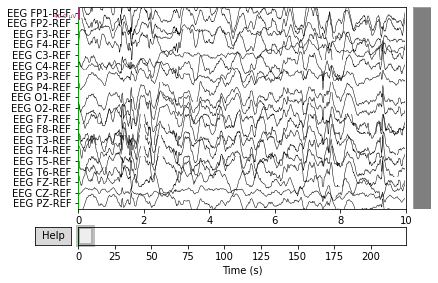

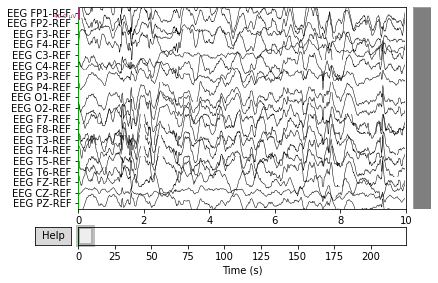

In [30]:
data_ch.plot()

# Spectrogram


In [31]:
raw_data = data_ch.get_data()

(array([[4.34321641e-09, 5.81736977e-09, 2.70559435e-09, ...,
         1.37573281e-09, 1.49058034e-10, 1.12440739e-12],
        [2.13322519e-09, 3.25749316e-09, 1.22268310e-09, ...,
         2.27710685e-09, 2.03143799e-10, 4.68819986e-12],
        [1.14635504e-10, 1.24043350e-11, 2.68224878e-11, ...,
         1.67690317e-09, 2.22989624e-11, 4.20355097e-11],
        ...,
        [5.02047970e-14, 2.07400522e-14, 3.08247411e-14, ...,
         2.26777682e-14, 5.21124371e-14, 8.47213691e-14],
        [9.22177235e-14, 1.00787533e-14, 2.08087617e-15, ...,
         2.17749082e-14, 3.44979773e-14, 1.31085845e-14],
        [6.09966181e-14, 1.03435245e-16, 5.20958326e-15, ...,
         1.69446362e-15, 6.45738491e-15, 3.24011854e-15]]),
 array([ 0.      ,  0.390625,  0.78125 ,  1.171875,  1.5625  ,  1.953125,
         2.34375 ,  2.734375,  3.125   ,  3.515625,  3.90625 ,  4.296875,
         4.6875  ,  5.078125,  5.46875 ,  5.859375,  6.25    ,  6.640625,
         7.03125 ,  7.421875,  7.8125  ,  8

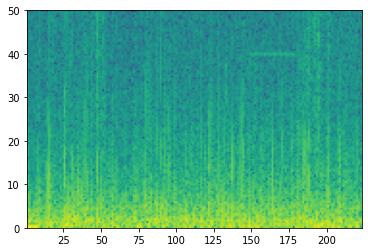

In [40]:
plt.specgram(raw_data[10],Fs=100)